# Can Text Analysis Show the Perceived Fall of the U.S. Election Debate Culture?

Analyzing the first election debate Biden vs. Trump (2020) and Clinton vs. Trump (2016)

This analysis is motivated by several public press comments mentioning that the style of the first U.S. election debate (Biden vs Trump, 2020) was less structured and had more elements of "blaming and attacking the opponent" rather than political content (by both sides)[1]:

* https://www.bbc.com/news/election-us-2020-54354405
* https://www.washingtonpost.com/elections/2020/09/30/trump-biden-live-updates/

[1] Assuming that this was unintended

## Data source

Obtain the raw data:
    
* https://www.rev.com/blog/transcripts/donald-trump-joe-biden-1st-presidential-debate-transcript-2020
* https://www.washingtonpost.com/news/the-fix/wp/2016/09/26/the-first-trump-clinton-presidential-debate-transcript-annotated/

Note 1: The transcript of the 2020 debate has timestamps, the 2016 does not. Therefore, we need a proxy is implemented to measure the length of a statement in seconds (see code below).

In [5]:
from datetime import datetime
import pandas as pd

In [6]:
# Helper function to extract the timestamp from the data
def extractTime(s):
    index1=s.find("(")
    index2=s.find(")")
    if ((index1!=-1) and (index2!=-1)):
        s1=s[index1+1:index2]
        if len(s1)==5:
            s1="00:"+s1
        return s1
    else:
        return "";

In [7]:
#Helper function to compute the difference in seconds between two timestamps
def difftime(start,end):
    if (len(start)>0 and len(end)>0):
        date_format = "%H:%M:%S"
        time_start = start
        time_end = end

        diff = datetime.strptime(time_end, date_format) - datetime.strptime(time_start, date_format)
        return diff.seconds
    else:
        return 0

### Load the 2020 data

In [8]:
lines=[]
with open('interview2020.txt', 'r',encoding="utf-8") as dat:
    lines = dat.readlines()

In [9]:
data = []
i=0;
while i<len(lines):
    line = lines[i].replace("\n", "")
    person=""
    text=""
    start=""
    end=""
    time=0
    #Extract the speaker
    if (line.startswith('Chris Wallace') or line.startswith('Vice President') or line.startswith('President Donald')):
        person=line
        #Extract time
        start=extractTime(person)
        i=i+1
        line = lines[i].replace("\n", "")
        text=line
        i=i+1
        k=i;
        #Move forward, read more lines until the next speaker appears
        if (k<len(lines)):
            while lines[k].find(":")==-1:
                k=k+1;
            
            #Get the next speaker, extract the timestamp
            if (k!=i):
                person2=lines[k].replace("\n", "") 
                end=extractTime(person2)
                time=difftime(start,end)
                #Only for the Part 2 transition in the text file where the time stamp jumps from 24:35 back to 00:00
                #This happens only in row 537, due to the specific file structure
                if (time>6000):
                    time=0
   
    if (i<len(lines)):
        while lines[i].find(":")==-1:
            i=i+1;
    data.append([person,text,start,end,time,person[0:1]])
    
df2020 = pd.DataFrame(data, columns=['Person', 'Text', 'Start','End','Time','Category'])

In [10]:
df2020

Person  \
0                   Chris Wallace: (01:20)   
1                   Chris Wallace: (02:10)   
2        Vice President Joe Biden: (02:49)   
3       President Donald J. Trump: (02:51)   
4        Vice President Joe Biden: (02:51)   
..                                     ...   
785              Chris Wallace: (01:10:43)   
786  President Donald J. Trump: (01:10:47)   
787              Chris Wallace: (01:10:48)   
788  President Donald J. Trump: (01:10:49)   
789              Chris Wallace: (01:10:50)   

                                                  Text     Start       End  \
0    Good evening from the Health Education Campus ...  00:01:20  00:02:10   
1    This debate is being conducted under health an...  00:02:10  00:02:49   
2                                  How you doing, man?  00:02:49  00:02:51   
3                                   How are you doing?  00:02:51  00:02:51   
4                                            I’m well.  00:02:51  00:03:11   
..                                                 ...       ...       ...   
785  Gentlemen, just say that’s the end of it [cros...  01:10:43  01:10:47   
786              I want to see an honest ballot count.  01:10:47  01:10:48   
787                     We’re going to leave it there-  01:10:48  01:10:49   
788                           And I think he does too-  01:10:49  01:10:50   
789  … to be continued in more debates as we go on....  01:10:50             

     Time Category  
0      50        C  
1      39        C  
2       2        V  
3       0        P  
4      20        V  
..    ...      ...  
785     4        C  
786     1        P  
787     1        C  
788     1        P  
789     0        C  

[790 rows x 6 columns]

In [11]:
df2020_trump=df2020.loc[df2020['Category'] =="P"]
df2020_biden=df2020.loc[df2020['Category'] =="V"]
df2020_wallace=df2020.loc[df2020['Category'] =="C"]

### Load the 2016 data

In [12]:
lines=[]
with open('interview2016.txt', 'r',encoding="utf-8") as dat:
    lines = dat.readlines()

In [13]:
data = []
i=0;
while i<len(lines):
    line = lines[i].replace("\n", "")
    person=""
    text=""
    #Identify the speaker
    if (line.startswith('HOLT:') or line.startswith('TRUMP:') or line.startswith('CLINTON:')):
        person=line[0:line.find(":")]
        text=line[line.find(":")+1:]
        i=i+1;
        #Attribute text to the identified speaker until a new speaker appears
        while i<len(lines) and lines[i].find("HOLT:")==-1 and lines[i].find("TRUMP:")==-1 and lines[i].find("CLINTON:")==-1 :
            line = lines[i].replace("\n", "")
            #Remove unnecessary words
            line = line.replace("(APPLAUSE)", "")
            if len(line)>0:
                text=text+line;
            i=i+1;  
    
    #This dataset has no timestamp, therefore a proxy is established
    #https://en.wikipedia.org/wiki/Speech_tempo
    #Typically a person might speak for words per second
    words = len(text.split())
    data.append([person,text,words,round(words/4,0),person[0:1]])
    
df2016 = pd.DataFrame(data, columns=['Person', 'Text','Words','Time','Category'])

In [14]:
df2016

Person                                               Text  Words  Time  \
0       HOLT   Good evening from Hofstra University in Hemps...    201  50.0   
1    CLINTON                               How are you, Donald?      4   1.0   
2       HOLT   Good luck to you.Well, I don't expect us to c...    188  47.0   
3    CLINTON   Well, thank you, Lester, and thanks to Hofstr...    142  36.0   
4    CLINTON   I also want to see more companies do profit-s...    187  47.0   
..       ...                                                ...    ...   ...   
290  CLINTON   Well, I support our democracy. And sometimes ...     91  23.0   
291     HOLT   Mr. Trump, very quickly, same question: Will ...     17   4.0   
292    TRUMP   I want to make America great again. We are a ...     90  22.0   
293     HOLT       Will you accept the outcome of the election?      8   2.0   
294    TRUMP   I want to make America great again. I’m going...     31   8.0   

    Category  
0          H  
1          C  
2          H  
3          C  
4          C  
..       ...  
290        C  
291        H  
292        T  
293        H  
294        T  

[295 rows x 5 columns]

In [15]:
df2016_trump=df2016.loc[df2016['Category'] =="T"]
df2016_clinton=df2016.loc[df2016['Category'] =="C"]
df2016_holt=df2016.loc[df2016['Category'] =="H"]

## Text Analysis Strategy

The strategy to assess a perceived fall of the U.S. election debate culture is based on two data points: 2016 (Clinton vs. Trump) and 2020 (Biden vs. Trump). Two data points are not sufficient but may serve as a start to expand this analysis to other debates.

What constitutes a "good" debate culture? Although "good" is a subjective and fuzzy measure, a first approach would be to define three different measures:

* Playing by the debate rules, e.g. do not interrupt the opponent
* Using appropriate language, e.g. using a minimum standard of language to express one's thoughts
* Addressing topics relevant to the voter




In [16]:
constitutesimport textstat
import seaborn as sns
import nltk.tokenize as nt
import nltk

### Playing by the rules

A measure if both opponents are playing by the rules is the number of interruptions. A statement is defined as an interruption (in this analysis) if the length of a statement is less than 2 seconds between two opponents. 

In [25]:
trump_number_of_total_statements_2020=len(df2020_trump)
trump_interruptions_2020=len(df2020_trump.loc[df2020_trump['Time'] <2])

biden_number_of_total_statements_2020=len(df2020_biden)
biden_interruptions_2020=len(df2020_biden.loc[df2020_biden['Time'] <2])

trump_number_of_total_statements_2016=len(df2016_trump)
trump_interruptions_2016=len(df2016_trump.loc[df2016_trump['Time'] <2])

clinton_number_of_total_statements_2016=len(df2016_clinton)
clinton_interruptions_2016=len(df2016_clinton.loc[df2016_clinton['Time'] <2])

In [34]:
#Share of interruptions compared to overall number of statements
print("Trump's Share of interruptions 2020:",round(trump_interruptions_2020 / (trump_number_of_total_statements_2020+biden_number_of_total_statements_2020),2))
print("Bidens's Share of interruptions 2020:",round(biden_interruptions_2020 / (trump_number_of_total_statements_2020+biden_number_of_total_statements_2020),2))

print("Trump's Share of interruptions 2016:",round(trump_interruptions_2016 / (trump_number_of_total_statements_2016+clinton_number_of_total_statements_2016),2))
print("Clinton's Share of interruptions 2016:",round(clinton_interruptions_2016 / (trump_number_of_total_statements_2016+clinton_number_of_total_statements_2016),2))

Trump's Share of interruptions 2020: 0.21
Bidens's Share of interruptions 2020: 0.18
Trump's Share of interruptions 2016: 0.13
Clinton's Share of interruptions 2016: 0.07


### Using appropriate language

A measure for "appropriate" language in this analysis is based on a combination of the following scores (explained in Textstat for Python: https://pypi.org/project/textstat/):

* Flesch Reading Ease Score: https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests#Flesch_reading_ease
* Flesch-Kincaid Grade Level: https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests#Flesch%E2%80%93Kincaid_grade_level
* The Fog Scale: https://en.wikipedia.org/wiki/Gunning_fog_index
* The SMOG Index: https://en.wikipedia.org/wiki/SMOG
* Automated Readability Index: https://en.wikipedia.org/wiki/Automated_readability_index
* The Coleman-Liau Index: https://en.wikipedia.org/wiki/Coleman%E2%80%93Liau_index
* Linsear Write Formula: https://en.wikipedia.org/wiki/Linsear_Write
* Dale-Chall Readability Score: https://en.wikipedia.org/wiki/Dale%E2%80%93Chall_readability_formula

The result is a measure showing what school grade level is required to understand the text. 

The implicit assumption here is that a text that requires a a school grade level 4th to 5th is less differentiated / elaborated than a 7th to 8th grade level because it uses "easier language". However, please note that an "easier language" might be even the purpose to make explicit "marketing-oriented" statements. 

The language level can also correlate with shorter statements (interruptions). 

In [40]:
text2020_trump="";
for index, row in df2020_trump.iterrows():
    text2020_trump=text2020_trump+ " "+row['Text']

print("Trump's language level 2020: ",textstat.text_standard(text2020_trump))

text2020_biden="";
for index, row in df2020_biden.iterrows():
    text2020_biden=text2020_biden+ " "+row['Text']

print("Biden's language level 2020: ",textstat.text_standard(text2020_biden)) 

text2016_trump="";
for index, row in df2016_trump.iterrows():
    text2016_trump=text2016_trump+ " "+row['Text']

print("Trump's language level 2016: ",textstat.text_standard(text2016_trump))

text2016_clinton="";
for index, row in df2016_clinton.iterrows():
    text2016_clinton=text2016_clinton+ " "+row['Text']

print("Clinton's language level 2016: ",textstat.text_standard(text2016_clinton))    

Trump's language level 2020:  4th and 5th grade
Biden's language level 2020:  5th and 6th grade
Trump's language level 2016:  6th and 7th grade
Clinton's language level 2016:  10th and 11th grade


### Addressing relevant topics

A quick visual measure of text topics is provided by a word cloud. Although this is a qualitative measure when it comes to interpretating it. For further suggestions please refer to the end of this article.

In order to create a wordcloud the text is tokenized and stopwords are removed. Only nouns are considered in the wordcloud, because the yield the highest information when it comes to topics. 



In [41]:
def convertTextToNouns(text):
    ss=nt.sent_tokenize(text)
    tokenized_sent=[nt.word_tokenize(sent) for sent in ss]
    pos_sentences=[nltk.pos_tag(sent) for sent in tokenized_sent]
    text_nouns=""
    for i in pos_sentences:
        for k in i:
            if (k[1]=="NN") or (k[1]=="NNS") or (k[1]=="NNP") or (k[1]=="NNPS"):
                if k[0]!="crosstalk" and k[0]!="CROSSTALK" and k[0]!="Interruption":
                    text_nouns=text_nouns+" "+k[0]
    return text_nouns;

In [43]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

Trump's topics in 2020


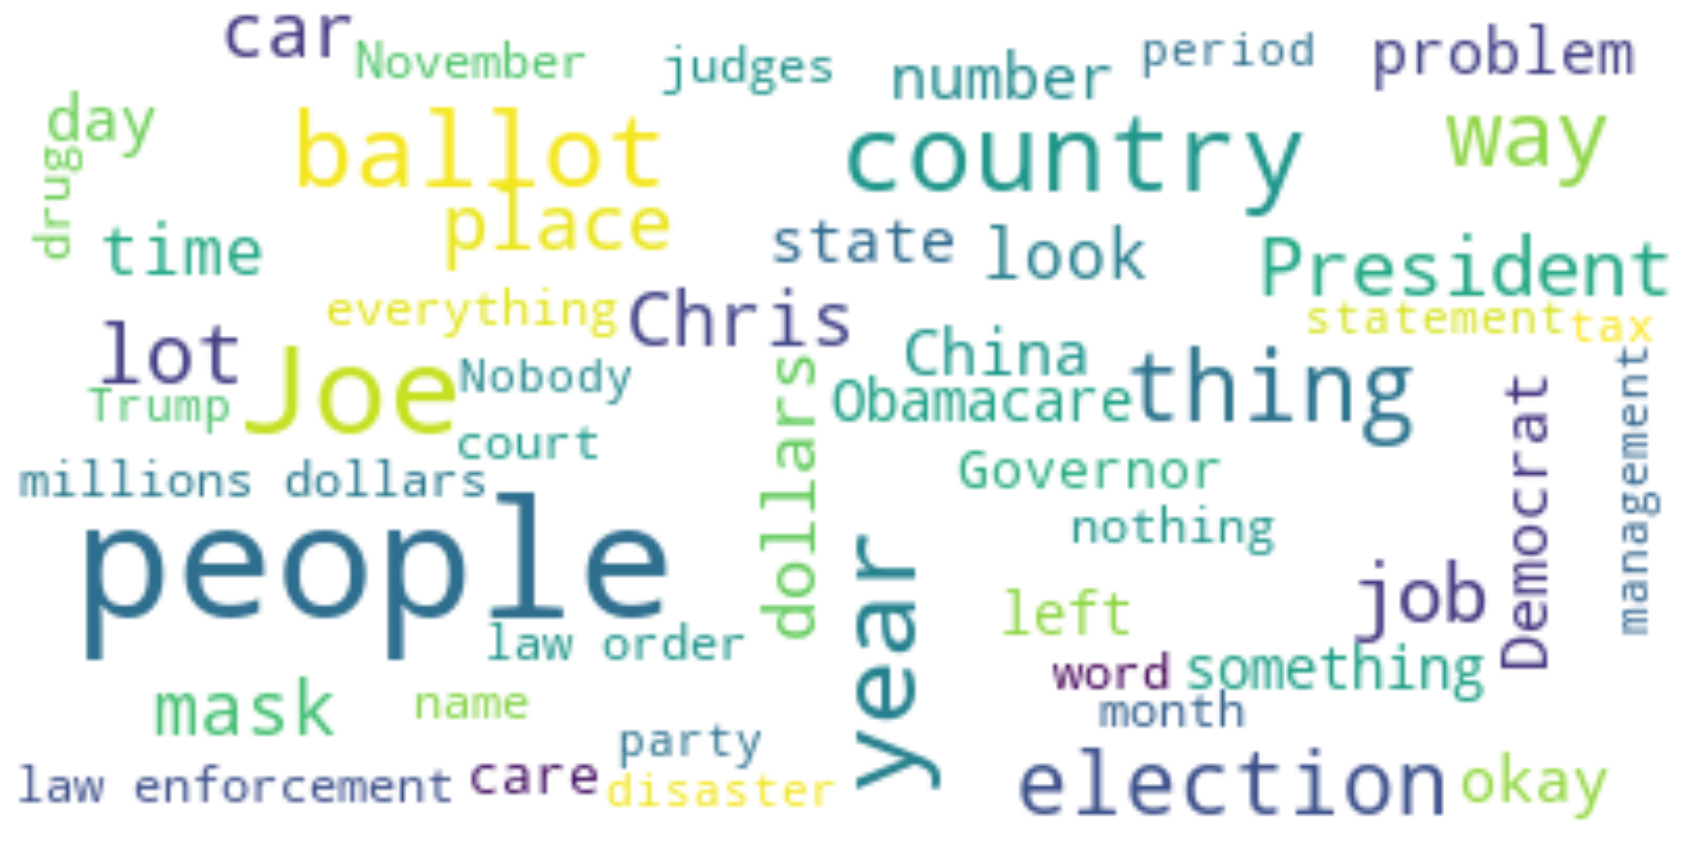

In [54]:
# lower max_font_size
print("Trump's topics in 2020")
wordcloud = WordCloud(max_font_size=40, max_words=50,background_color="white",stopwords=STOPWORDS,min_word_length=3).generate(convertTextToNouns(text2020_trump))
plt.figure(figsize=[30,30])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Trump's topics in 2016


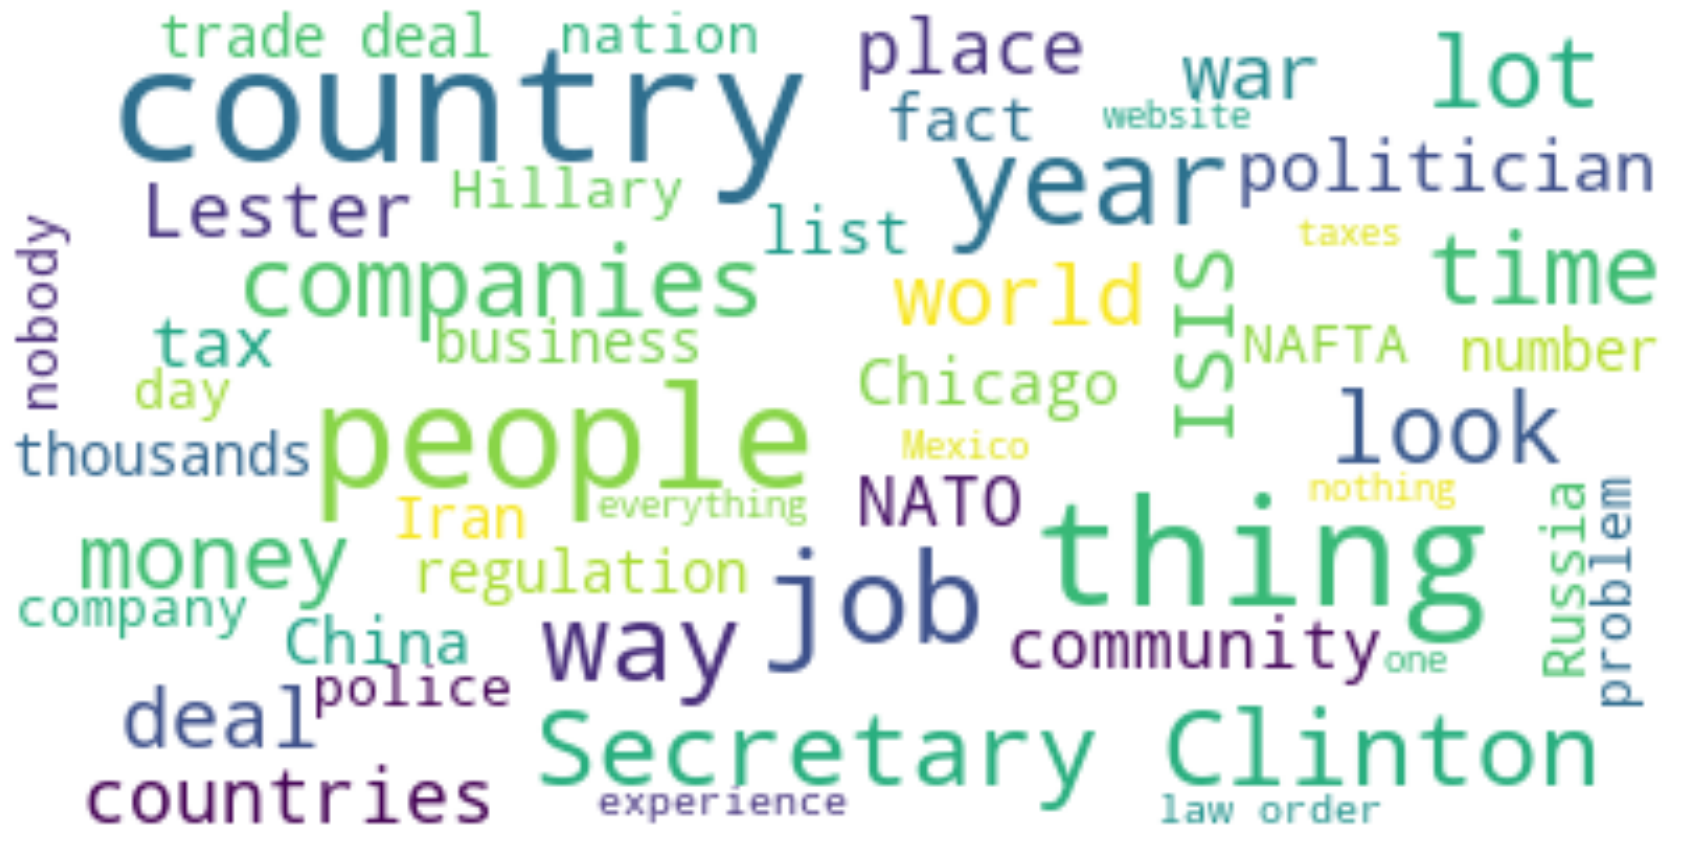

In [55]:
# lower max_font_size
print("Trump's topics in 2016")
wordcloud = WordCloud(max_font_size=40, max_words=50,background_color="white",stopwords=STOPWORDS,min_word_length=3).generate(convertTextToNouns(text2016_trump))
plt.figure(figsize=[30,30])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Biden's topics in 2020


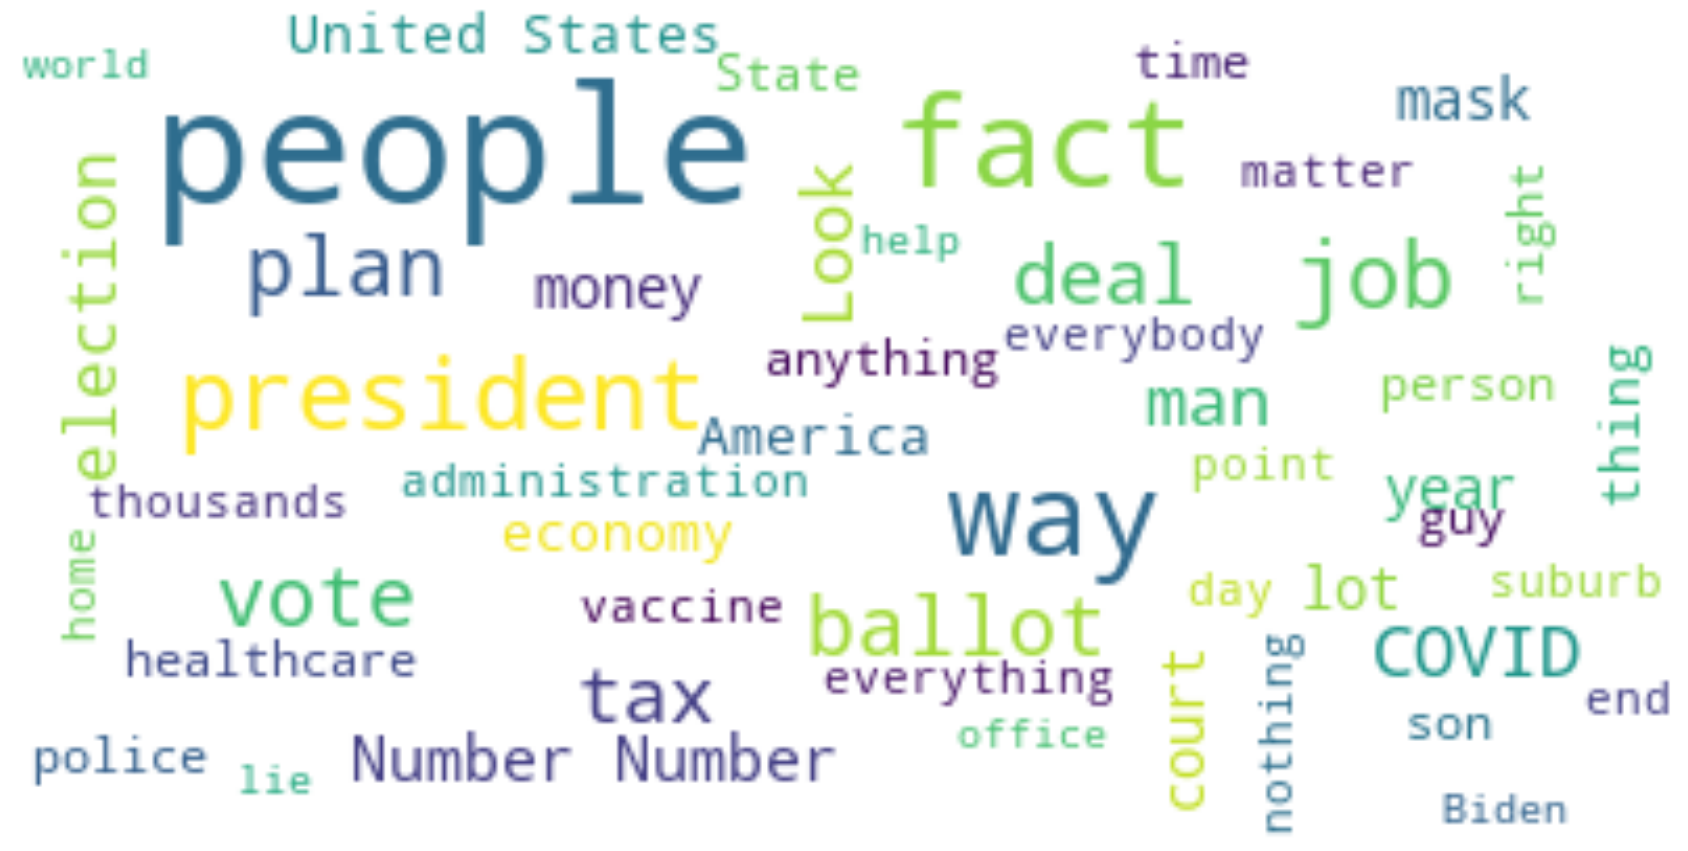

In [56]:
# lower max_font_size
print("Biden's topics in 2020")
wordcloud = WordCloud(max_font_size=40, max_words=50,background_color="white",stopwords=STOPWORDS,min_word_length=3).generate(convertTextToNouns(text2020_biden))
plt.figure(figsize=[30,30])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Clinton's topics in 2016


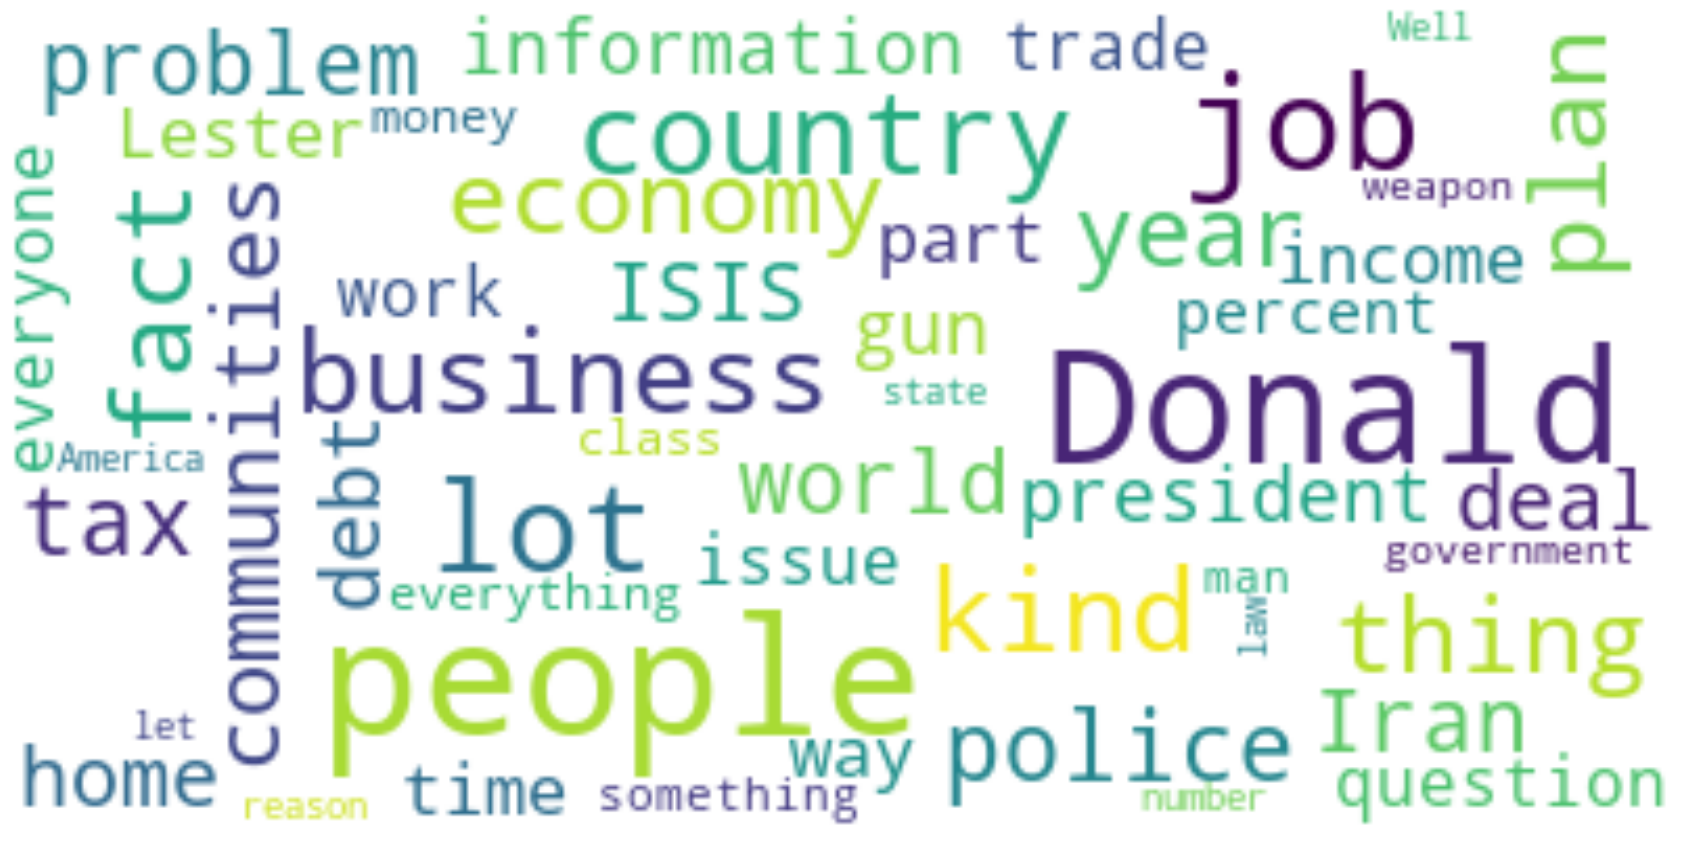

In [57]:
# lower max_font_size
print("Clinton's topics in 2016")
wordcloud = WordCloud(max_font_size=40, max_words=50,background_color="white",stopwords=STOPWORDS,min_word_length=3).generate(convertTextToNouns(text2016_clinton))
plt.figure(figsize=[30,30])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Compare topics between 2016 and 2020

Topics in 2016


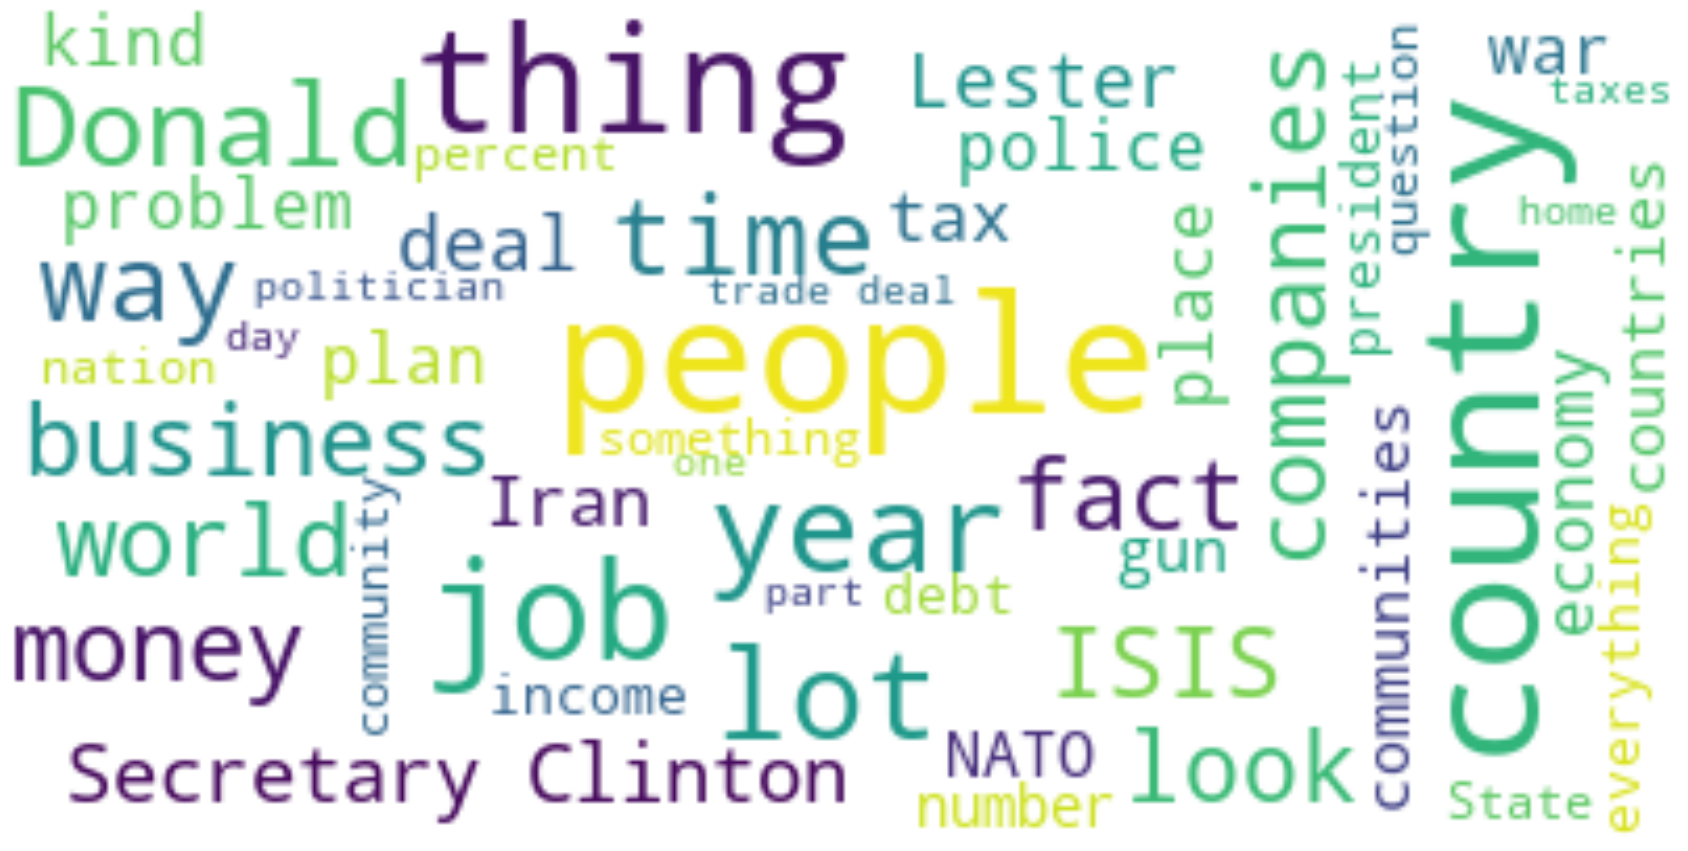

In [58]:
# lower max_font_size
print("Topics in 2016")
topics_2016=convertTextToNouns(text2016_clinton)+ " "+convertTextToNouns(text2016_trump)
wordcloud = WordCloud(max_font_size=40, max_words=50,background_color="white",stopwords=STOPWORDS,min_word_length=3).generate(topics_2016)
plt.figure(figsize=[30,30])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Topics in 2020


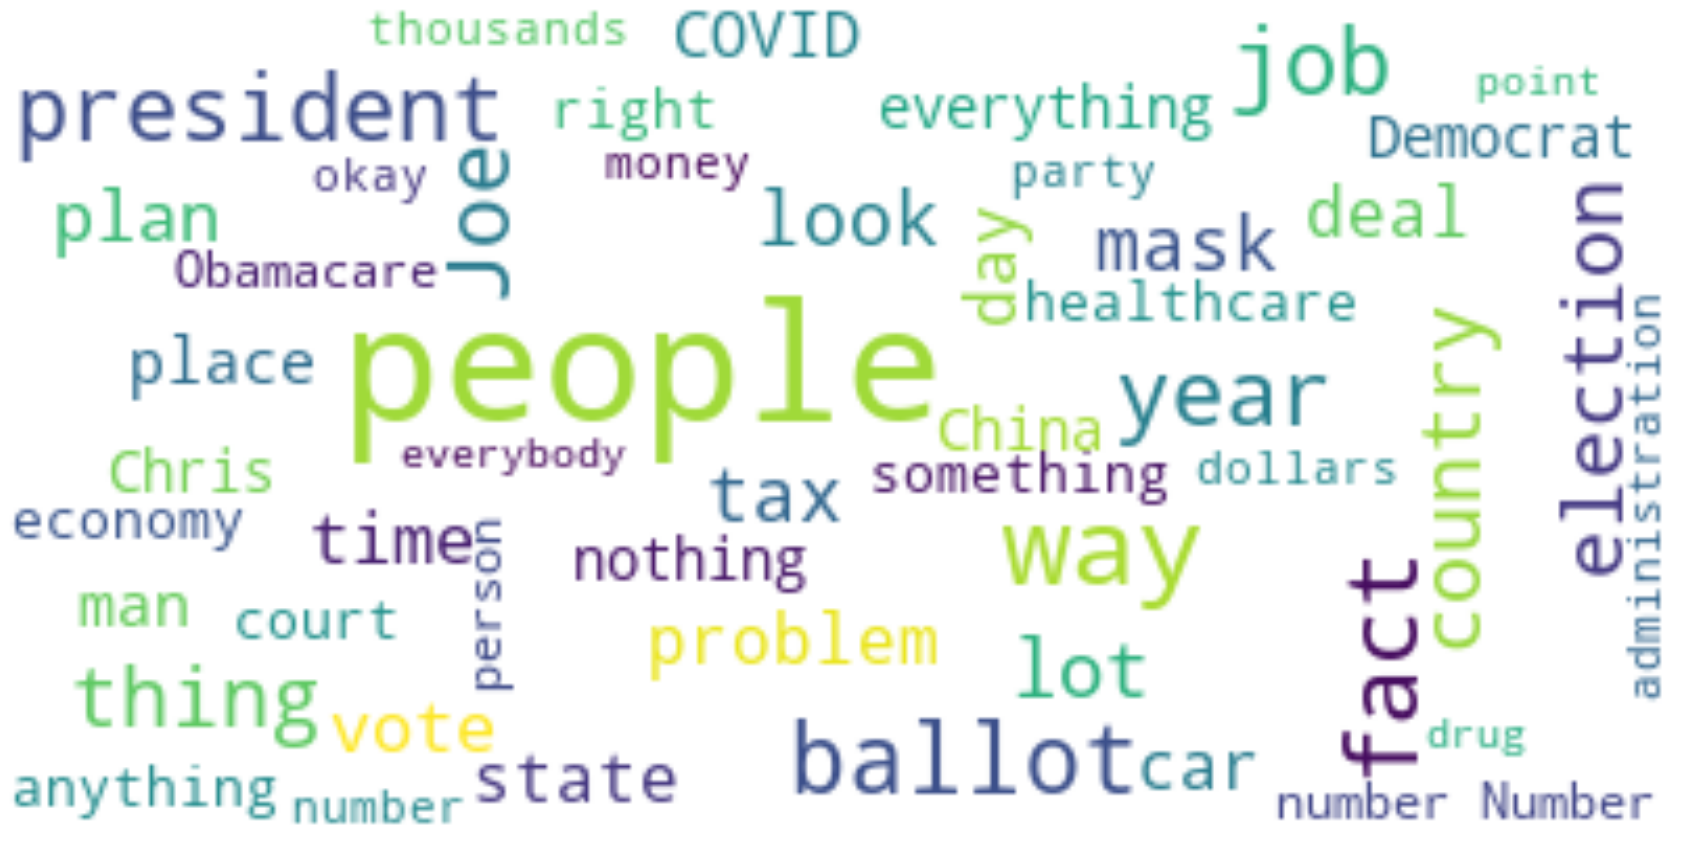

In [59]:
# lower max_font_size
print("Topics in 2020")
topics_2020=convertTextToNouns(text2020_biden)+ " "+convertTextToNouns(text2020_trump)
wordcloud = WordCloud(max_font_size=40, max_words=50,background_color="white",stopwords=STOPWORDS,min_word_length=3).generate(topics_2020)
plt.figure(figsize=[30,30])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Further Analysis

This notebook can be taken as a first step to analyze the election debate culture. Further improvements to support the initial hypothesis in terms of

* Add more debate transscriptions (data points)
* Conduct a visual analysis, how often the candidates are addressing the votes compared to looking/attacking the opponent
* Use more sophisticated topic analysis methods (LDA) for a quantitative analysis
* Analyze the "tone of the debate" by analyzing adjectives/verbs